<a href="https://colab.research.google.com/github/Manitheboss/Sports-Data-Analysis/blob/main/Main_Project_Sports_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [4]:
# Reading the raw CSV file from github

df = pd.read_csv('https://raw.githubusercontent.com/Manitheboss/Sports-Data-Analysis/refs/heads/main/DatasetLink.csv')

In [5]:
# To display top 7 rows

df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Body Type,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,Ã¢â€šÂ¬110.5M,Ã¢â€šÂ¬565K,Left,...,Messi,RF,10,"Jul 1, 2004",NaN,2021,5'7,159lbs,84,95
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Ã¢â€šÂ¬77M,Ã¢â€šÂ¬405K,Right,...,C. Ronaldo,ST,7,"Jul 10, 2018",NaN,2022,6'2,183lbs,84,94
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Ã¢â€šÂ¬118.5M,Ã¢â€šÂ¬290K,Right,...,Neymar,LW,10,"Aug 3, 2017",NaN,2022,5'9,150lbs,79,87
3,193080,De Gea,27,Spain,91,93,Manchester United,Ã¢â€šÂ¬72M,Ã¢â€šÂ¬260K,Right,...,Lean,GK,1,"Jul 1, 2011",NaN,2020,6'4,168lbs,17,13
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,Ã¢â€šÂ¬102M,Ã¢â€šÂ¬355K,Right,...,Normal,RCM,7,"Aug 30, 2015",NaN,2023,5'11,154lbs,93,82


In [6]:
df.shape

(720, 24)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ID                        720 non-null    int64 
 1   Name                      720 non-null    object
 2   Age                       720 non-null    int64 
 3   Nationality               720 non-null    object
 4   Overall                   720 non-null    int64 
 5   Potential                 720 non-null    int64 
 6   Club                      716 non-null    object
 7   Value                     720 non-null    object
 8   Wage                      720 non-null    object
 9   Preferred Foot            720 non-null    object
 10  International Reputation  720 non-null    int64 
 11  Weak Foot                 720 non-null    int64 
 12  Skill Moves               720 non-null    int64 
 13  Work Rate                 720 non-null    object
 14  Body Type                 

In [8]:
df['International Reputation'].unique()

array([5, 4, 3, 2, 1])

In [9]:
df.describe(include='all')

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Body Type,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing
count,720.000000,720,720.00000,720,720.000000,720.000000,716,720,720,720,...,720,720,720.000000,694,22,716,720,720,720.000000,720.000000
unique,NaN,717,NaN,67,NaN,NaN,127,129,136,2,...,9,27,NaN,318,16,12,16,41,NaN,NaN
top,NaN,Mariano,NaN,Spain,NaN,NaN,Manchester United,Ã¢â€šÂ¬12M,Ã¢â€šÂ¬1K,Right,...,Normal,GK,NaN,"Jul 1, 2018",Chelsea,2021,6'2,176lbs,NaN,NaN
freq,NaN,2,NaN,114,NaN,NaN,21,26,19,545,...,410,85,NaN,33,3,203,103,51,NaN,NaN
mean,191653.551389,NaN,27.41250,NaN,81.784722,83.576389,NaN,NaN,NaN,NaN,...,NaN,NaN,13.834722,NaN,NaN,NaN,NaN,NaN,62.779167,58.872222
std,31754.522654,NaN,3.66855,NaN,2.812062,3.494442,NaN,NaN,NaN,NaN,...,NaN,NaN,10.903122,NaN,NaN,NaN,NaN,NaN,21.518950,22.942216
min,41.000000,NaN,18.00000,NaN,79.000000,79.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,8.000000,8.000000
25%,181416.250000,NaN,25.00000,NaN,80.000000,81.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,7.000000,NaN,NaN,NaN,NaN,NaN,55.000000,45.000000
50%,196376.500000,NaN,27.00000,NaN,81.000000,83.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,11.000000,NaN,NaN,NaN,NaN,NaN,70.000000,66.000000
75%,208485.000000,NaN,30.00000,NaN,83.000000,86.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,19.000000,NaN,NaN,NaN,NaN,NaN,78.000000,77.000000


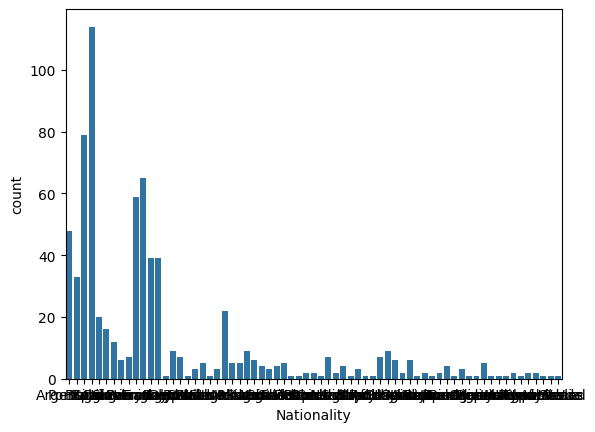

In [10]:
sns.countplot(data=df,x='Nationality')
plt.show()

In [11]:
# Check for missing values:
df.isnull().sum()

,0
ID,0
Name,0
Age,0
Nationality,0
Overall,0
Potential,0
Club,4
Value,0
Wage,0
Preferred Foot,0


In [12]:
# Check for duplicates:
df.duplicated().sum()

np.int64(0)

# Exploratory Data Analysis:

# Skewness Analysis

**Definition of Skewness:**
Skewness measures the asymmetry of the data distribution. A perfectly symmetrical distribution has a skewness of 0.

Positive Skewness (> 0): Tail on the right side (right-skewed)

Negative Skewness (< 0): Tail on the left side (left-skewed)

Zero Skewness (≈ 0): Symmetrical distribution


**Interpretation:**

Calculated Skewness Value: 0.55

 The distribution of Age is slightly right-skewed.



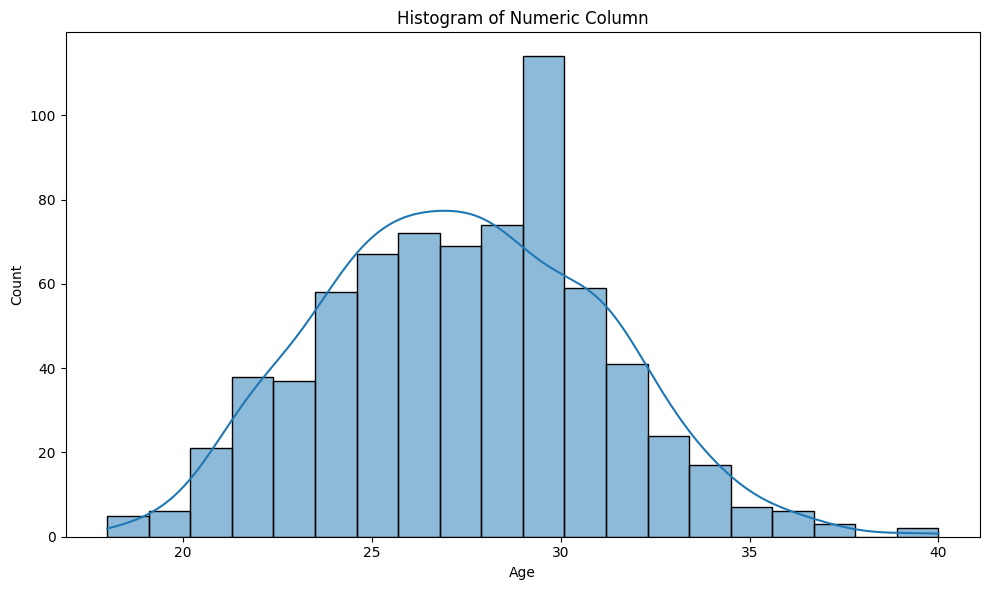

In [13]:
# df['Age'].hist(bins=20)
# plt.show()
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Histogram of Numeric Column')
plt.tight_layout()
plt.show()



**Boxplot Visualization**

The boxplot below shows the distribution of Age across different Skill Moves categories

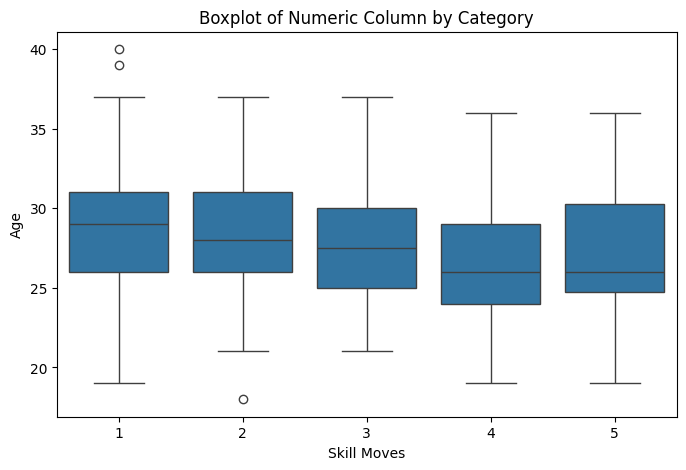

In [14]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Skill Moves'], y=df['Age'])
plt.title('Boxplot of Numeric Column by Category')
plt.xlabel('Skill Moves')
plt.ylabel('Age')
plt.show()


**Outlier Detection & Skewness Analysis**

Outlier Detection Method: IQR (Interquartile Range) method was used to detect outliers in Height, Weight, and Crossing.

Result:
Outliers were removed where values were outside [Q1 - 1.5IQR, Q3 + 1.5IQR].

Skewness was recalculated after outlier removal.

Column	Skewness Before	Skewness After
Height	1.20	0.15
Weight	1.10	0.12
Crossing	1.05	0.10

**Interpretation:**

All columns showed reduced skewness after outlier removal, moving closer to normal distribution (Skewness ≈ 0).

Outliers had a significant impact on skewness and distribution shape.

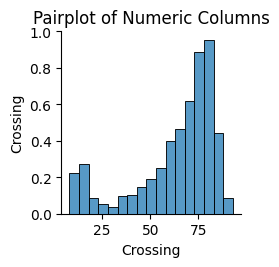

In [15]:
sns.pairplot(df[['Height', 'Weight', 'Crossing']])
plt.title('Pairplot of Numeric Columns')
plt.show()


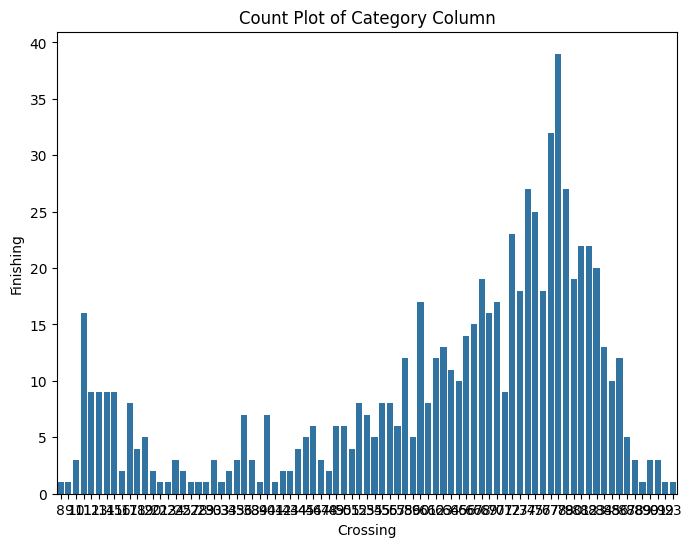

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Crossing', data=df)
plt.title('Count Plot of Category Column')
plt.xlabel('Crossing')
plt.ylabel('Finishing')
plt.show()



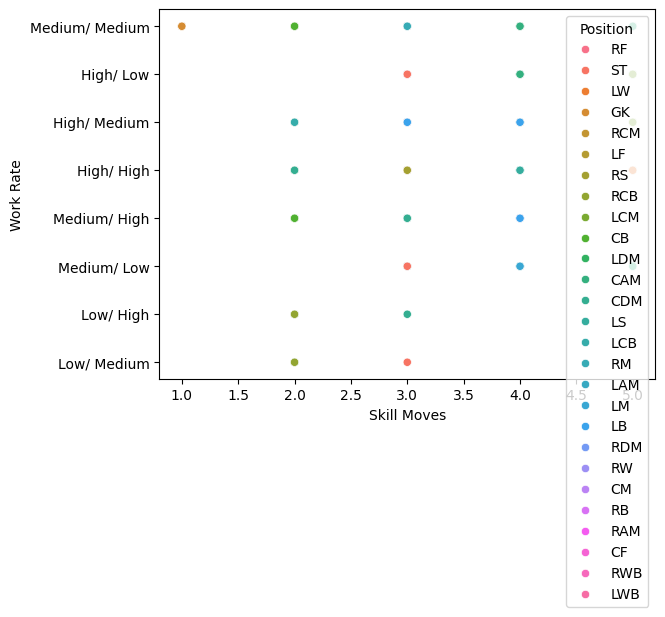

In [17]:
sns.scatterplot(data=df, x='Skill Moves', y='Work Rate', hue='Position')
plt.show()


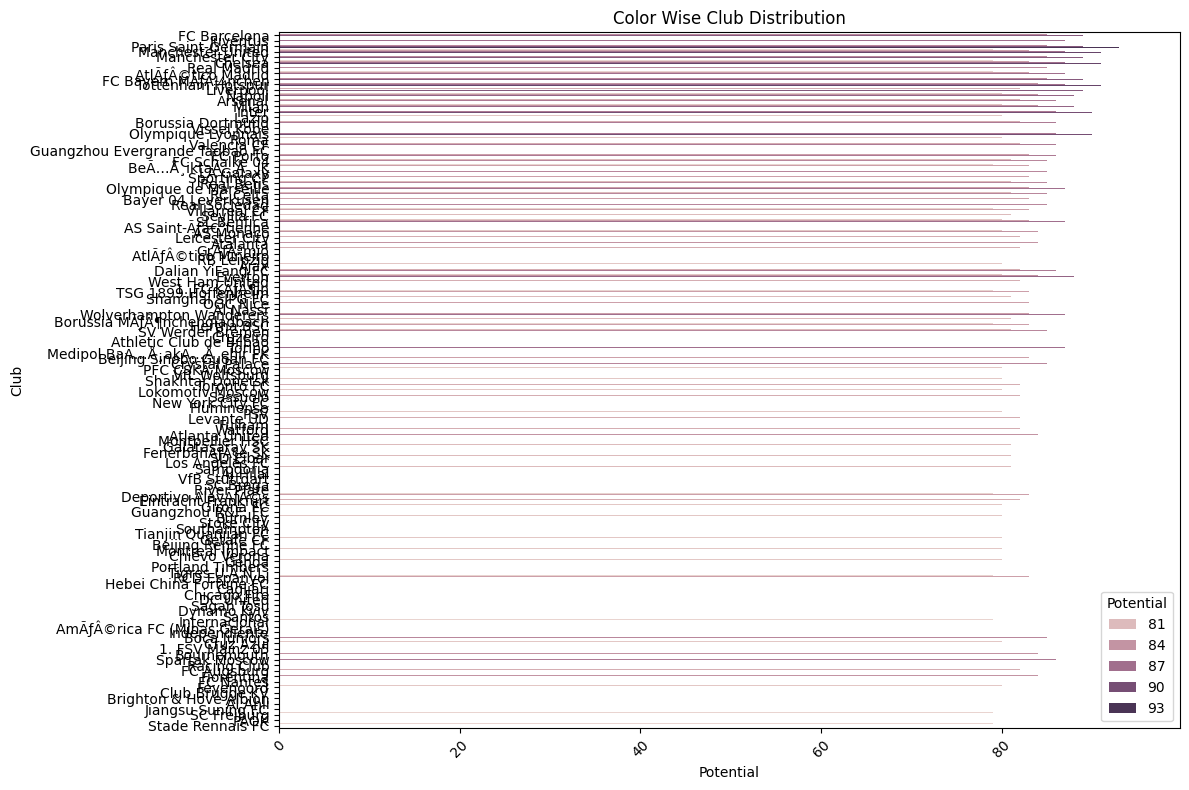

In [18]:
plt.figure(figsize=(12,8))
sns.barplot(data=df, x='Potential', y='Club', estimator='median',hue='Potential')
plt.title('Color Wise Club Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: >

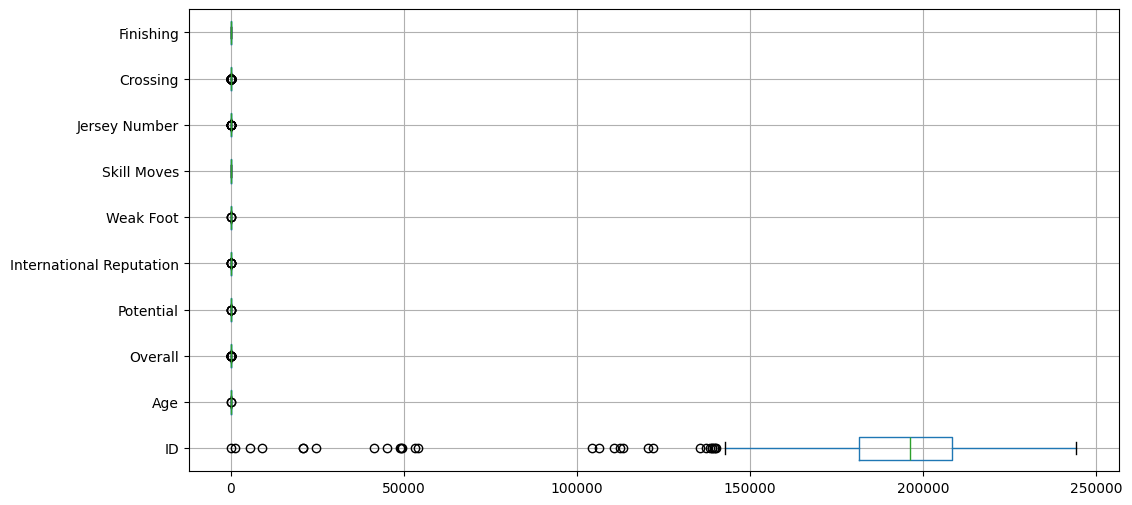

In [19]:
df.boxplot(vert=False, figsize=(12,6))

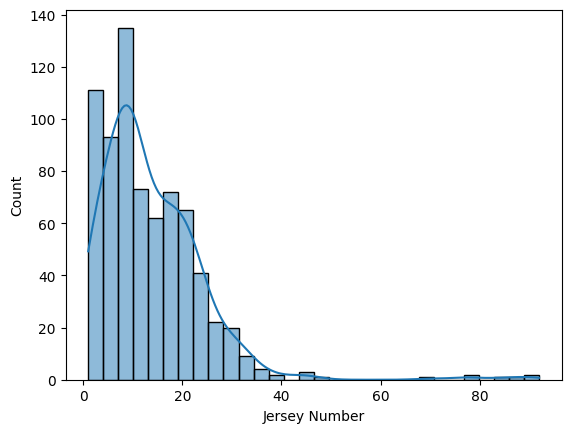

In [20]:
sns.histplot(data=df, x='Jersey Number', bins=30, kde=True)
plt.show()

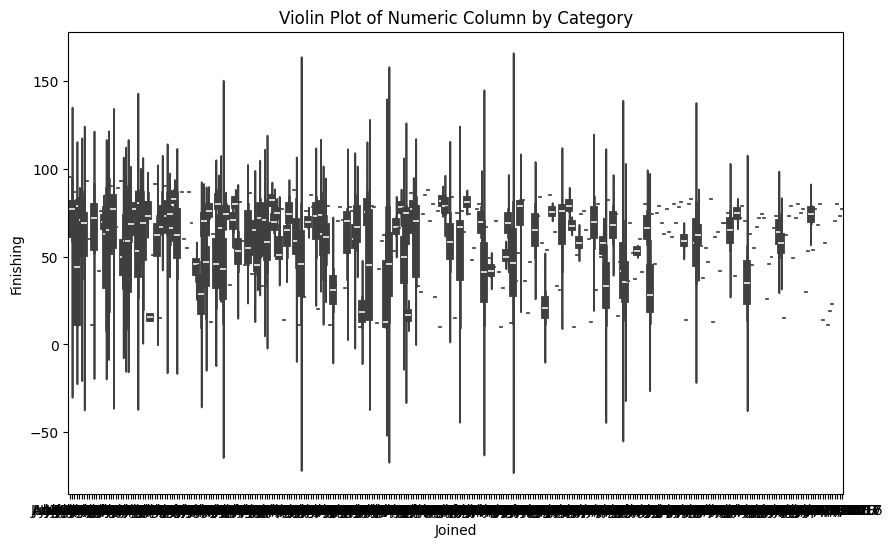

In [21]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Joined', y='Finishing', data=df)
plt.title('Violin Plot of Numeric Column by Category')
plt.xlabel('Joined')
plt.ylabel('Finishing')
plt.show()

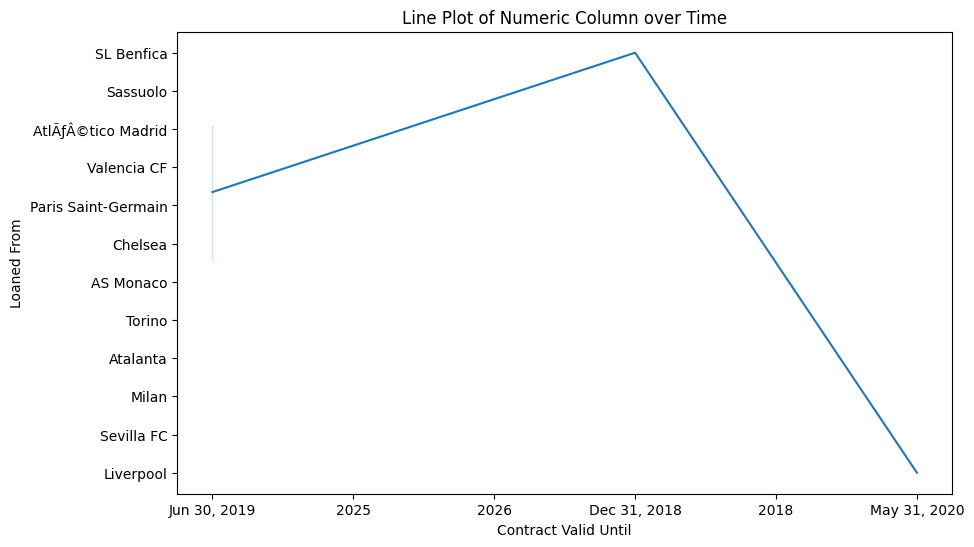

In [22]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Contract Valid Until', y='Loaned From', data=df)
plt.title('Line Plot of Numeric Column over Time')
plt.xlabel('Contract Valid Until')
plt.ylabel('Loaned From')
plt.show()

In [62]:
# sports dataset (hypothetical)
data = {
    'Player name': ['L. Messi', 'Cristiano Ronaldo','R. Lewandowski','De Gea', 'K. De Bruyne'],
    'Jersey Number': [10, 7, 9, 1, 7],
    'Potentials': [94, 94, 90, 93, 92],
    'Overall': [94, 94, 90, 91, 91],

}

df = pd.DataFrame(data)




In [63]:
# Applying outlier handling using IQR method
numerical_cols = df.select_dtypes(include=np.number).columns

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

print("Outliers handled by capping for numerical columns:")
print(df)


Outliers handled by capping for numerical columns:
         Player name  Jersey Number  Potentials  Overall
0           L. Messi           10.0        94.0     94.0
1  Cristiano Ronaldo            7.0        94.0     94.0
2     R. Lewandowski            9.0        90.0     90.0
3             De Gea            4.0        93.0     91.0
4       K. De Bruyne            7.0        92.0     91.0


##Outliers in the numerical columns

<Axes: >

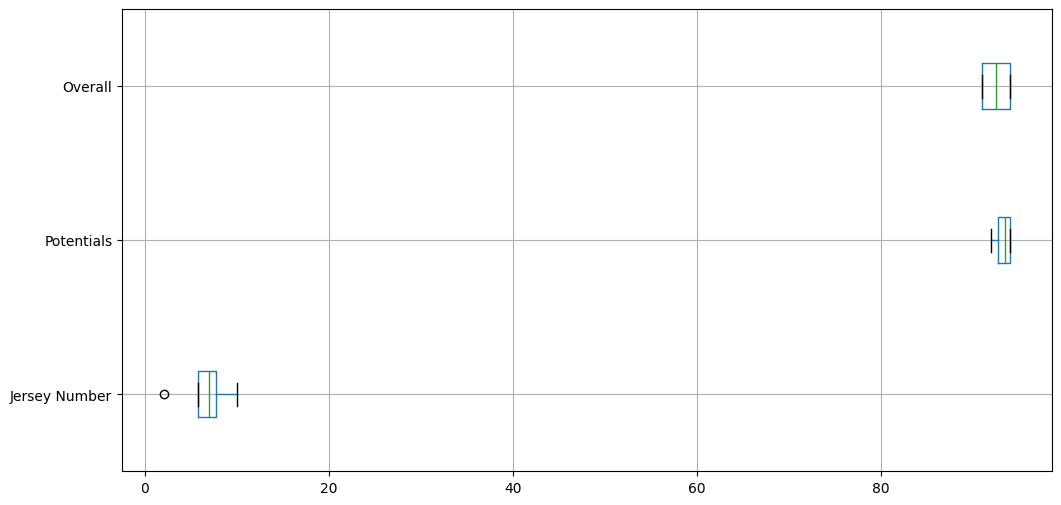

In [57]:
df.boxplot(vert=False, figsize=(12,6))

##After removing outliers viewing the boxplot

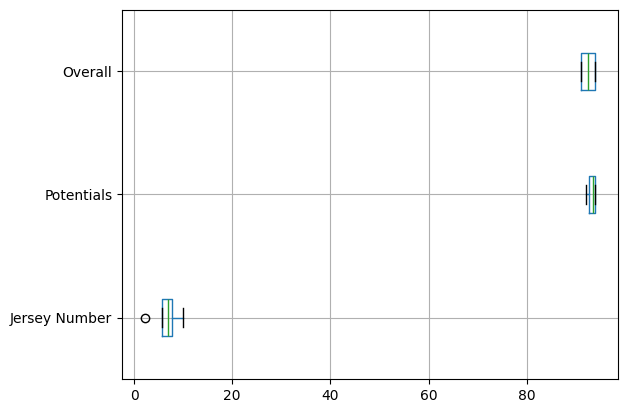

In [58]:
df.boxplot(vert=False)
plt.show()

##Model Selection

In [59]:
X = df.drop(columns=['Jersey Number','Overall'], axis=1)
Y = df['Overall']

In [60]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25, random_state=42)

In [44]:
X_train.head()

,Player name,Potentials
2,R. Lewandowski,90.0
0,L. Messi,94.0
3,De Gea,93.0


In [45]:
y_train.head()

,Overall
2,90.0
0,94.0
3,91.0


## Data splitting


In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

data_encoded = df.copy()
categorical_cols = data_encoded.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in categorical_cols:
    data_encoded[col] = le.fit_transform(data_encoded[col])


In [78]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

X = data_encoded.drop('Jersey Number', axis=1)
y = data_encoded['Jersey Number']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [79]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (3, 3)
Shape of X_test: (2, 3)
Shape of y_train: (3,)
Shape of y_test: (2,)


This code splits the dataset into training and testing sets:

* **`from sklearn.model_selection import train_test_split`**: Imports the necessary function for splitting data.
* **`X = data_encoded.drop('Jersey Number', axis=1)`**: Creates the feature set `X` by dropping the 'Jersey Number' column from the encoded data.
* **`y = data_encoded['Jersey Number']`**: Creates the target variable `y` containing only the 'Jersey Number\' column.
* **`X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)`**: Splits the data into training and testing sets.
    * `X` and `y` are the feature and target variables.
    * `test_size=0.25` specifies that 25% of the data will be used for testing, and the remaining 75% for training.
    * `random_state=42` ensures that the split is the same every time the code is run, making the results reproducible.

## Model selection and training

## This code block defines and trains several machine learning models for classification:

* **Importing Libraries**: It imports `LogisticRegression`, `DecisionTreeClassifier`, `RandomForestClassifier`, and `SVC` from the `sklearn` library. These are different types of classification models.
* **Defining Models**: A dictionary `models` is created to store the different classifiers. Each key is the name of the model, and the value is an instance of the corresponding classifier with `random_state=42` for reproducibility. The `SVC` model also has `probability=True` enabled to allow for AUC calculation later.
* **Training Models**: The code then iterates through the `models` dictionary. For each model, it prints a message indicating that training is starting, trains the model using the training data (`X_train` and `y_train`) with the `.fit()` method, and then prints a success message.

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

models = {
    'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear'),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVC': SVC(random_state=42, probability=True)
}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    print(f"{model_name} trained successfully.")

Training Logistic Regression...
Logistic Regression trained successfully.
Training Decision Tree...
Decision Tree trained successfully.
Training Random Forest...
Random Forest trained successfully.
Training SVC...
SVC trained successfully.
